In [1]:
#!pip install xlrd

In [2]:
import os
import datetime as dt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [20, 20]

In [3]:
def transform_guzmart(df):
    df['fecha_corte'] = pd.to_datetime(df['fecha_corte'])
    df['fecha_inicio'] = pd.to_datetime(df['fecha_inicio'])
    return df

def get_guzmart(date, force=False):
    sdate = date.strftime('%Y%m%d')
    fname = f"covid_mex_{sdate}"
    local_fname = f"data/guzmart/{fname}.h5"
    if not force and os.path.isfile(local_fname):
        df = pd.read_hdf(local_fname, 'df')
    else:
        url = f"https://github.com/guzmart/covid19_mex/raw/master/01_datos/covid_mex_{sdate}.xlsx"
        df = pd.read_excel(url)
        df = transform_guzmart(df)
        #guardar version csv y hdf
        csv_fname = f"data/guzmart/{fname}.csv"
        df.to_csv(csv_fname)
        df.to_hdf(local_fname, 'df')
    return df

In [4]:
def transform_johns_hopkins(df):
    df = df.groupby('Country/Region').sum()
    cols = list(df.columns)
    cols.remove('Lat')
    cols.remove('Long')
    df = df[cols]
    df = df.transpose()
    df.index = pd.to_datetime(df.index, format='%m/%d/%y')
    df.index.name = "Date"
    return df#[columns]

def get_johns_hopkins():
    url = "https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
    df = pd.read_csv(url)
    df = transform_johns_hopkins(df)
    fname = f"data/CSSEGUSandData/time_series_covid19_confirmed_global.csv"
    df.to_csv(fname)
    return df

In [5]:
def transform_sinave_eduardofv(df):
    df = df.groupby('Estado').sum()
    df = df.transpose()
    df.index = pd.to_datetime(df.index, format='%Y/%m/%d')
    df.index.name = "Date"
    return df#[columns]

def get_sinave_eduardofv():
    url = "https://raw.githubusercontent.com/eduardofv/covid/master/data/sinave/series_tiempo/serie_tiempo_confirmados.csv"
    df = pd.read_csv(url)
    df = transform_sinave_eduardofv(df)
    return df    

In [6]:
def get_new_per_day(df):
    new_per_day = {}
    for location in df.columns:
        d = df[location]
        dif = [d[i] - d[i-1] for i in range(1,len(d))]
        new_per_day[location] = dif

    df_new_per_day = pd.DataFrame(new_per_day)
    df_new_per_day.index = df.index[1:]
    return df_new_per_day

# Mundo

In [7]:
dfw = get_johns_hopkins()
dfw.head(10)

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,5,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,6,0,...,0,4,0,0,0,0,2,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,9,0,...,0,4,0,0,0,0,2,0,0,0


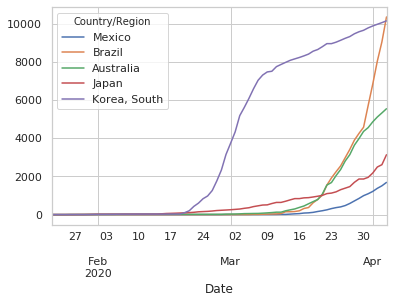

In [8]:
dfw[["Mexico", "Brazil", "Australia", "Japan", "Korea, South"]].plot(logy=False)

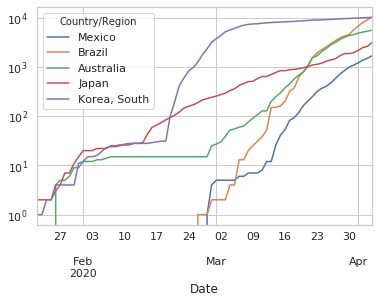

In [9]:
dfw[["Mexico", "Brazil", "Australia", "Japan", "Korea, South"]].plot(logy=True)

In [10]:
dfw_new_per_day = get_new_per_day(dfw)
dfw_new_per_day.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


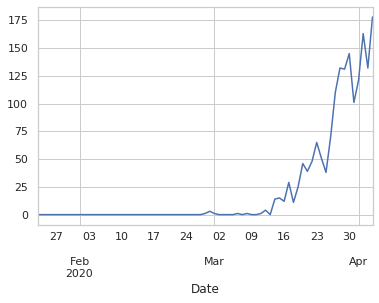

In [11]:
dfw_new_per_day['Mexico'].plot()

In [12]:
def calculate_new_per_period(df_new_per_day, PERIOD=7):
    new_per_period = {}
    for country in df_new_per_day.columns:
        d = df_new_per_day[country]
        cum = [sum(d[(i-PERIOD):i]) for i in range(PERIOD, len(d))]
        new_per_period[country] = cum
    return new_per_period

In [13]:
def cum_and_new_from_init(dfw, new_per_period, country, INIT=99):
    d = dfw[country]
    cum_from_init = d[d>INIT]
    new_from_init = new_per_period[country][-len(cum_from_init):]
    assert len(cum_from_init) == len(new_from_init)
    return cum_from_init, new_from_init

In [14]:
dfw.columns[dfw.columns.str.contains("Korea")]

Index(['Korea, South'], dtype='object', name='Country/Region')

Text(0, 0.5, 'new cases last days')

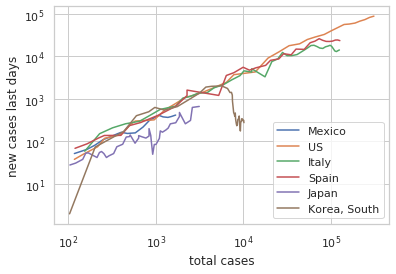

In [15]:
new_per_period = calculate_new_per_period(dfw_new_per_day, PERIOD=3)
countries = ['Mexico', 'US', 'Italy', 'Spain', 'Japan', 'Korea, South']

#Genius Eric & Aatish: https://aatishb.com/covidtrends/
f, ax = plt.subplots()
ax.set(yscale="log", xscale="log")
for country in countries:
    cum, new = cum_and_new_from_init(dfw, new_per_period, country)
    plt.plot(cum, new)
plt.legend(countries)
plt.xlabel("total cases")
plt.ylabel("new cases last days")

# México

In [16]:
dfmx = get_sinave_eduardofv()
dfmx.head(10)

Estado,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-02,47,40,19,5,15,11,327,62,3,8,...,56,33,42,21,62,13,5,29,53,7
2020-04-03,48,52,21,6,18,12,384,70,4,8,...,65,35,51,22,73,16,8,35,59,7
2020-04-04,49,54,27,8,19,13,469,72,4,10,...,75,35,74,27,83,20,9,37,62,10


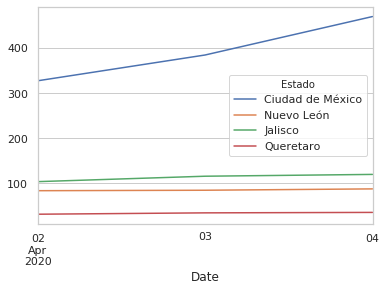

In [17]:
estados = ["Ciudad de México", "Nuevo León", "Jalisco", "Queretaro"]
dfmx[estados].plot(logy=False)

In [18]:
dfmx_new_per_day = get_new_per_day(dfmx)
dfmx_new_per_day.head()

,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-03,1,12,2,1,3,1,57,8,1,0,...,9,2,9,1,11,3,3,6,6,0
2020-04-04,1,2,6,2,1,1,85,2,0,2,...,10,0,23,5,10,4,1,2,3,3


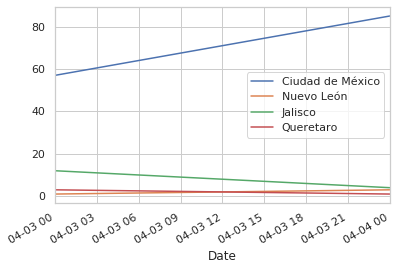

In [19]:
for estado in estados:
    dfmx_new_per_day[estado].plot()
plt.legend(estados)

# México (anterior, con datos de @guzmart)

In [20]:
#yesterday = dt.date.today() - dt.timedelta(days=1)
#Ultimos datos válidos que encontramos
fecha = dt.date(2020,4,1)#yesterday #dt.date.today()
df = transform_guzmart(get_guzmart(fecha, force=True))#yesterday
df.head(10)

,num_caso,ent,sexo,edad,fecha_inicio,identificado,procedencia,fecha_llegada_mexico,fecha_corte,inconsistencia_nuevo,inconsistencia_nuevo_fecha,inconsistencia_omision,inconsistencia_omision_fecha_ult_aparicion
0,1,CIUDAD DE MÉXICO,M,35,2020-02-22,confirmado,Italia,2020-02-22,2020-02-27,0,NaT,0,NaT
1,2,SINALOA,M,41,2020-02-22,confirmado,Italia,2020-02-21,2020-02-28,0,NaT,0,NaT
2,3,CIUDAD DE MÉXICO,M,59,2020-02-23,confirmado,Italia,2020-02-22,2020-02-29,0,NaT,0,NaT
3,4,COAHUILA,F,20,2020-02-27,confirmado,Italia,2020-02-25,2020-02-29,0,NaT,0,NaT
4,5,CHIAPAS,F,18,2020-02-25,confirmado,Italia,2020-02-25,2020-03-01,0,NaT,0,NaT
5,6,MÉXICO,M,71,2020-02-21,confirmado,Italia,2020-02-21,2020-03-06,0,NaT,0,NaT
6,7,CIUDAD DE MÉXICO,M,46,2020-02-29,confirmado,Estados Unidos,2020-02-29,2020-03-07,0,NaT,0,NaT
7,8,QUERETARO,M,43,2020-03-09,confirmado,España,2020-03-06,2020-03-11,0,NaT,0,NaT
8,9,CIUDAD DE MÉXICO,M,41,2020-03-07,confirmado,Estados Unidos,2020-03-06,2020-03-11,0,NaT,0,NaT
9,10,CIUDAD DE MÉXICO,F,30,2020-03-07,confirmado,España,2020-03-06,2020-03-11,0,NaT,0,NaT


In [21]:
counts = df["fecha_corte"].value_counts().sort_index()
counts

2020-02-27      1
2020-02-28      1
2020-02-29      2
2020-03-01      1
2020-03-06      1
2020-03-07      1
2020-03-11      5
2020-03-12      3
2020-03-13     11
2020-03-14     15
2020-03-15     12
2020-03-16     29
2020-03-17     11
2020-03-18     25
2020-03-19     46
2020-03-20     40
2020-03-21     48
2020-03-22     65
2020-03-23     51
2020-03-24     38
2020-03-25     70
2020-03-26    111
2020-03-27    133
2020-03-28    132
2020-03-29    145
2020-03-30    101
2020-03-31    120
2020-04-01    172
Name: fecha_corte, dtype: int64

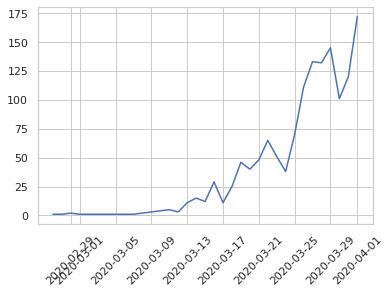

In [22]:
f, ax = plt.subplots()#figsize=(14, 10))
#ax.set(yscale="log")
plt.xticks(rotation=45)
p = sns.lineplot(data=counts)

In [23]:
cum = counts.cumsum()
cum

2020-02-27       1
2020-02-28       2
2020-02-29       4
2020-03-01       5
2020-03-06       6
2020-03-07       7
2020-03-11      12
2020-03-12      15
2020-03-13      26
2020-03-14      41
2020-03-15      53
2020-03-16      82
2020-03-17      93
2020-03-18     118
2020-03-19     164
2020-03-20     204
2020-03-21     252
2020-03-22     317
2020-03-23     368
2020-03-24     406
2020-03-25     476
2020-03-26     587
2020-03-27     720
2020-03-28     852
2020-03-29     997
2020-03-30    1098
2020-03-31    1218
2020-04-01    1390
Name: fecha_corte, dtype: int64

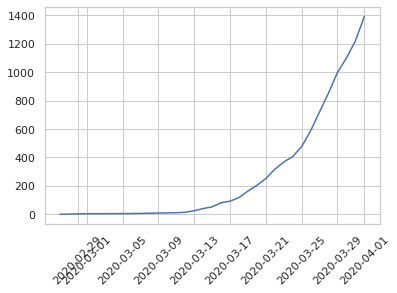

In [24]:
plt.xticks(rotation=45)
sns.lineplot(data=cum)

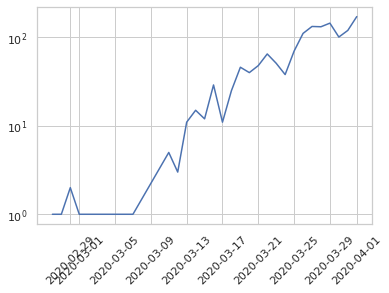

In [25]:
f, ax = plt.subplots()#figsize=(14, 10))
plt.xticks(rotation=45)
ax.set(yscale="log")
sns.lineplot(data=counts)